# Analysis of the S&P 500
Kenny Song
## Introduction

The Standard and Poor's 500, or more commonly refered to as the S&P 500, is a stock market index which contains 500 of the largest companies in the United States (though not an exact list of the top 500 companies). This index is used to measure the value of the US stock market and the health of the US economy. Alongside the Dow Jones Industrial Average and the NASDAQ Composite, the S&P 500 is one the most widely followed stock market indexes. 

Companies in the S&P 500 are weighted by market capitalization (share price multiplied by number of shares outstanding), so larger companies influence the index more heavily. Currently the top 5 companies by market capitalization in the S&P 500, from highest to lowest, are: Apple, Microsoft, Alphabhet (Google), Amazon, and NVIDIA. 

Acquiring wealth is a universally shared ambition. For many people becoming a multi-millionaire is a dream, a dream that often feels out of reach. 
And whether or not you aspire to becoming rich, money is nonetheless an important aspect of your life. You'll spend a a majority of your waking day working to make money and a majority of your adult life working to save money for your retirement. And unless you're one of those lucky few individuals who are truly passionate about the work you do — your 9-5 job, the thing you spend a majority of your life doing, is a means to an end: to make money. 

Now, in order to build wealth, it is crucial that you invest money. The inflation rate as of July 2023 was 3.2% according the CPI (more about CPI here https://www.bls.gov/cpi/). That is to say the average price of goods and services have increased 3.2% from a year ago. As a result, you're spending power actually decreases for the money you save and hold on to. Therefore, it's important to invest money if you wish to build wealth.

If you would have invested 1000 dollars into a fund which tracks the S&P 500 (such as Standard & Poor's depository receipt, more about that here https://www.investopedia.com/terms/s/spiders.asp), 10 years ago, your investment would be worth approximately 2869 dollars today.

Compared to other investment options, the S&P 500 holds up well. Since 1957 when 500 stocks were adopted in the index to December 2022, the average annual rate of return has been 10.15% (More here https://www.investopedia.com/ask/answers/042415/what-average-annual-return-sp-500.asp).

In fact, Warren Buffett, the man widely regarded as being the greatest investor views the S&P 500 as a good buy. He argued that as opposed to putting your money into an actively managed fund, it would be wiser to invest into a passively managed fund that tracks an index such as the S&P 500. In 2008, he made a bet with the hedge fund industry that an S&P 500 index fund would generate greater returns over 10 years than a portfolio of stocks hand-picked by professionals. And in the end, Warren Buffet won (more about that bet here https://www.investopedia.com/articles/investing/030916/buffetts-bet-hedge-funds-year-eight-brka-brkb.asp).

In [1]:
!pip install pandasql
!pip install lxml
!pip install html5lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from pandasql import sqldf

## Part 1: Data Collection

First we're going to get a list of all companies in the S&P 500 by scraping data from this website: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = BeautifulSoup(r.content, 'html.parser')
table = pd.read_html(str(soup))
companies = table[0]
companies.head()

Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                 Pharmaceuticals   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989

Next, we're going to scrape price information about each company using this website: https://markets.businessinsider.com/index/components/s&p_500
However, the information is split up between 10 different pages. So we need to make 10 seperate requests, each one getting information about 50 companies in the S&P 500.

In [3]:
# List to store individual tables
tableList = [] 

for i in range(1,11):
    #Add the page query param to the end of the url
    url = 'https://markets.businessinsider.com/index/components/s&p_500?p=' + str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    tables = pd.read_html(str(soup))
    # Add the table from this page to the list
    tableList.append(tables[0])
    
# Combine all tables into a single DataFrame
combined_table = pd.concat(tableList, ignore_index=True)
combined_table.tail()

Name Latest Price Previous Close       Low High  \
470        Wynn Resorts                 93.75 93.75    93.00 94.80   
471         Xcel Energy                 58.11 58.11    58.08 58.65   
472               Xylem                 99.46 99.46   98.41 100.35   
473         YUM! Brands               129.12 129.12  128.39 129.93   
474  Zebra Technologies               274.32 274.32  260.81 274.03   

            +/- %            Time Date     3 Mo. +/- %     6 Mo. +/- %  \
470  -0.13 -0.14%  07:46 PM 19.08.2023  -14.13 -12.97%  -14.22 -13.04%   
471  -0.08 -0.14%  06:52 PM 19.08.2023   -7.87 -11.92%   -9.84 -14.47%   
472    0.04 0.04%  04:48 PM 18.08.2023    -4.46 -4.29%    -7.78 -7.25%   
473    0.02 0.02%  05:26 PM 18.08.2023    -7.33 -5.34%    -2.12 -1.61%   
474    2.34 0.86%  06:47 PM 19.08.2023    -5.64 -2.08%  -56.55 -17.53%   

       1 Year +/- %  
470    29.37 44.89%  
471  -18.76 -24.39%  
472    -2.83 -2.77%  
473     10.79 9.06%  
474  -74.42 -21.86%

In [4]:
#Standardize the name of each company in both tables by keeping only the first word in the name and converting to lowercase
companies['name'] = companies['Security'].str.split().str[0].str.lower()
combined_table['name'] = combined_table['Name'].str.split().str[0].str.lower()
#Then merge the two tables together
merged_data = pd.merge(companies, combined_table, on='name', how='inner')
merged_data.tail()

Symbol            Security             GICS Sector  \
500   WYNN        Wynn Resorts  Consumer Discretionary   
501    XEL         Xcel Energy               Utilities   
502    XYL          Xylem Inc.             Industrials   
503    YUM         Yum! Brands  Consumer Discretionary   
504   ZBRA  Zebra Technologies  Information Technology   

                                GICS Sub-Industry   Headquarters Location  \
500                              Casinos & Gaming        Paradise, Nevada   
501                               Multi-Utilities  Minneapolis, Minnesota   
502  Industrial Machinery & Supplies & Components  White Plains, New York   
503                                   Restaurants    Louisville, Kentucky   
504            Electronic Equipment & Instruments  Lincolnshire, Illinois   

     Date added      CIK Founded   name                Name  \
500  2008-11-14  1174922    2002   wynn        Wynn Resorts   
501  1957-03-04    72903    1909   xcel         Xcel Energy   
502  2011-11-01  1524472    2011  xylem               Xylem   
503  1997-10-06  1041061    1997   yum!         YUM! Brands   
504  2019-12-23   877212    1969  zebra  Zebra Technologies   

    Latest Price Previous Close       Low High         +/- %  \
500                 93.75 93.75    93.00 94.80  -0.13 -0.14%   
501                 58.11 58.11    58.08 58.65  -0.08 -0.14%   
502                 99.46 99.46   98.41 100.35    0.04 0.04%   
503               129.12 129.12  128.39 129.93    0.02 0.02%   
504               274.32 274.32  260.81 274.03    2.34 0.86%   

               Time Date     3 Mo. +/- %     6 Mo. +/- %    1 Year +/- %  
500  07:46 PM 19.08.2023  -14.13 -12.97%  -14.22 -13.04%    29.37 44.89%  
501  06:52 PM 19.08.2023   -7.87 -11.92%   -9.84 -14.47%  -18.76 -24.39%  
502  04:48 PM 18.08.2023    -4.46 -4.29%    -7.78 -7.25%    -2.83 -2.77%  
503  05:26 PM 18.08.2023    -7.33 -5.34%    -2.12 -1.61%     10.79 9.06%  
504  06:47 PM 19.08.2023    -5.64 -2.08%  -56.55 -17.53%  -74.42 -21.86%

In [5]:
#The column for Latest Price Previous Close seems to contain two duplicate values, as the latest price equals
#previous close, we'll just keep latest price
merged_data["Latest Price"] = merged_data["Latest Price Previous Close"].str.split().str[0]
merged_data.drop(columns=['Latest Price Previous Close'], inplace=True)
merged_data.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    ABT               Abbott             Health Care   
2   ABBV               AbbVie             Health Care   
3    ACN            Accenture  Information Technology   
4   ATVI  Activision Blizzard  Communication Services   

                GICS Sub-Industry     Headquarters Location  Date added  \
0        Industrial Conglomerates     Saint Paul, Minnesota  1957-03-04   
1           Health Care Equipment   North Chicago, Illinois  1957-03-04   
2                 Pharmaceuticals   North Chicago, Illinois  2012-12-31   
3  IT Consulting & Other Services           Dublin, Ireland  2011-07-06   
4  Interactive Home Entertainment  Santa Monica, California  2015-08-31   

       CIK      Founded        name                 Name       Low High  \
0    66740         1902          3m                   3M   99.59 100.49   
1     1800         1888      abbott  Abbott Laboratories  103.28 105.06   
2  1551152  2013 (1888)      abbvie               AbbVie  149.23 150.93   
3  1467373         1989   accenture            Accenture  301.35 304.84   
4   718877         2008  activision  Activision Blizzard    90.30 91.00   

          +/- %            Time Date   3 Mo. +/- %    6 Mo. +/- %  \
0    0.14 0.14%  07:52 PM 19.08.2023    1.58 1.58%  -11.24 -9.95%   
1    0.02 0.02%  07:25 PM 19.08.2023  -3.89 -3.58%   -1.85 -1.73%   
2  -1.13 -0.75%  07:32 PM 19.08.2023    6.62 4.62%   -1.34 -0.89%   
3    0.06 0.02%  07:49 PM 19.08.2023   21.22 7.46%   28.67 10.34%   
4    0.23 0.25%  07:51 PM 19.08.2023  12.54 16.10%   12.86 16.58%   

     1 Year +/- % Latest Price  
0  -45.67 -30.98%       100.18  
1    -5.62 -5.08%       103.71  
2      8.54 6.04%       149.00  
3   -12.64 -3.97%       303.04  
4     9.90 12.29%        90.70

In [6]:
#Remove some of the other columns so our table is neater
columns_to_keep = ['Name', 'Symbol', 'GICS Sector', 'Latest Price', '3 Mo. +/- %', '1 Year +/- %']
cleaner_table = merged_data[columns_to_keep]
cleaner_table
del merged_data

The columns for 3 Mo. +/- % and 1 Year +/- % represent how much the stock is up or down compared to its price either 3 months ago or 1 year ago.
For example, say Activision Blizzard's value for 3 Mo. +/- % is 12.54 16.10%. This means, Activision stock is up 12.54 dollars or 16.1% from its price 3 months.

In [7]:
#Let's split those values into separate columns

#Splitting the 3 month price/percent change into two different columns
cleaner_table.loc[:, "3 Mo. Price Change"] = cleaner_table["3 Mo. +/- %"].str.split().str[0]
cleaner_table.loc[:, "3 Mo. Percent Change"] = cleaner_table["3 Mo. +/- %"].str.split().str[1]
cleaner_table.drop(columns=['3 Mo. +/- %'], inplace=True)

#Splitting the 1 year price/percent change into two different columns
cleaner_table.loc[:,"1 Year Price Change"] = cleaner_table["1 Year +/- %"].str.split().str[0]
cleaner_table.loc[:,"1 Year Percent Change"] = cleaner_table["1 Year +/- %"].str.split().str[1]
cleaner_table.drop(columns=['1 Year +/- %'], inplace=True)

#Convert price from a string to a float
cleaner_table['Latest Price'] = cleaner_table['Latest Price'].str.replace(',', '').astype(float)
cleaner_table.head()

Name Symbol             GICS Sector  Latest Price  \
0                   3M    MMM             Industrials        100.18   
1  Abbott Laboratories    ABT             Health Care        103.71   
2               AbbVie   ABBV             Health Care        149.00   
3            Accenture    ACN  Information Technology        303.04   
4  Activision Blizzard   ATVI  Communication Services         90.70   

  3 Mo. Price Change 3 Mo. Percent Change 1 Year Price Change  \
0               1.58                1.58%              -45.67   
1              -3.89               -3.58%               -5.62   
2               6.62                4.62%                8.54   
3              21.22                7.46%              -12.64   
4              12.54               16.10%                9.90   

  1 Year Percent Change  
0               -30.98%  
1                -5.08%  
2                 6.04%  
3                -3.97%  
4                12.29%

Let's also add each company's market cap, to the table. And to do this we'll need to scrape data from another website including market cap.

In [8]:
r = requests.get('https://www.liberatedstocktrader.com/sp-500-companies/')
soup = BeautifulSoup(r.content, 'html.parser')
table = pd.read_html(str(soup))
with_marketcap = table[1]
with_marketcap.head()

#Make the first row, the column names
with_marketcap.columns = with_marketcap.iloc[0]
with_marketcap = with_marketcap[1:]

#Merge the two tables on ticker symbol
s_and_p_companies = pd.merge(with_marketcap, cleaner_table, left_on='Ticker', right_on='Symbol', how='inner')

#Remove some columns
columns_to_keep = ['Ticker', 'Description', 'GICS Sector', 'Latest Price', 'Market Capitalization', '3 Mo. Price Change', '3 Mo. Percent Change','1 Year Price Change', '1 Year Percent Change']
companies = s_and_p_companies[columns_to_keep]
del s_and_p_companies

#Convert market cap from a string to a float
companies['Market Capitalization'] = companies['Market Capitalization'].str.replace(',', '').astype(float)
companies.head()

Ticker            Description             GICS Sector  Latest Price  \
0   AAPL             Apple Inc.  Information Technology        174.70   
1   MSFT  Microsoft Corporation  Information Technology        317.00   
2   GOOG          Alphabet Inc.  Communication Services        127.63   
3   GOOG          Alphabet Inc.  Communication Services        128.24   
4  GOOGL          Alphabet Inc.  Communication Services        127.63   

   Market Capitalization 3 Mo. Price Change 3 Mo. Percent Change  \
0           2.728017e+12               1.31                0.76%   
1           2.351372e+12               2.88                0.92%   
2           1.611856e+12               9.08                7.51%   
3           1.611856e+12               8.98                7.39%   
4           1.610344e+12               9.08                7.51%   

  1 Year Price Change 1 Year Percent Change  
0               -0.55                -0.32%  
1               25.56                 8.77%  
2               10.37                 8.67%  
3               10.14                 8.43%  
4               10.37                 8.67%

Next, we're going to read in csv files containing historical prices of SPY (a stock that mimics the S&P 500, equal to value of S&P 500 index divided by 10), NVDA (NVIDIA), and AAPL (Apple). All from https://www.macrotrends.net/ 

In [9]:
spy = pd.read_csv('SPY.txt')
aapl = pd.read_csv('AAPL.txt')
nvda = pd.read_csv('NVDA.txt')

#Convert dates to datetime
spy['date'] = pd.to_datetime(spy['date']) 
aapl['date'] = pd.to_datetime(aapl['date']) 
nvda['date'] = pd.to_datetime(nvda['date']) 

#We'll only consider the closing price on for each day
#So convert closing price to float
spy['close'] = spy['close'].astype(float)
aapl['close'] = aapl['close'].astype(float)
nvda['close'] = nvda['close'].astype(float)

## Part 2: Data Exploration

Let's try to understand the distribution of market capitalization, for the different sectors in the S&P 500.

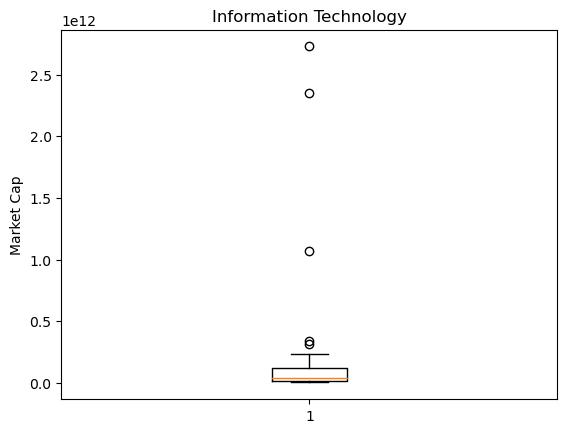

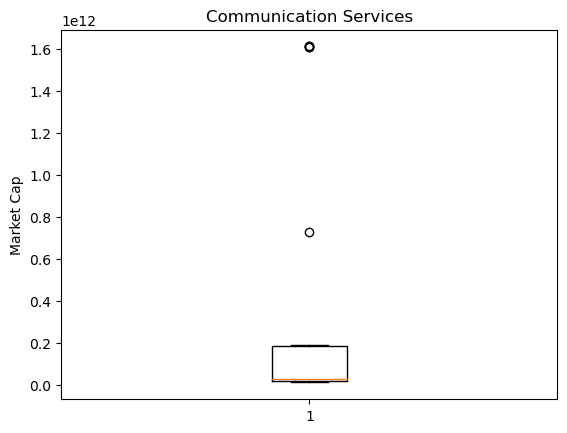

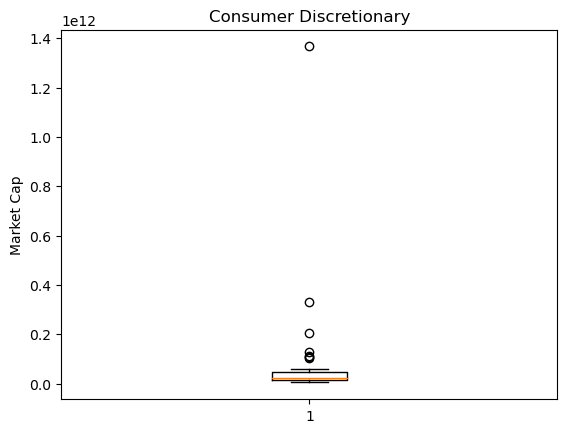

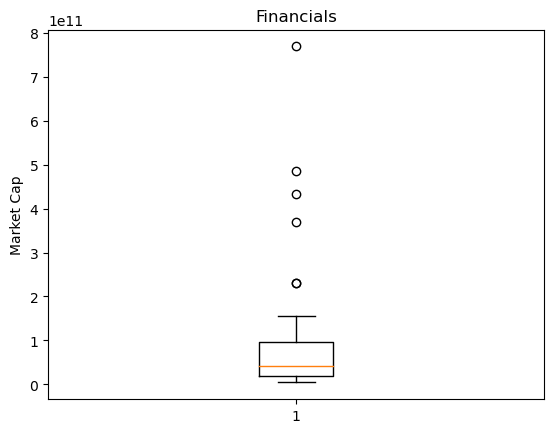

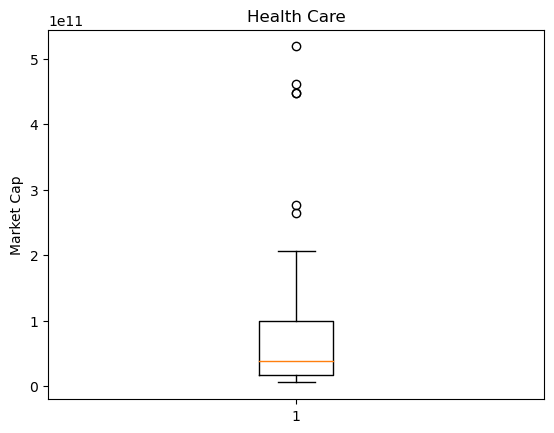

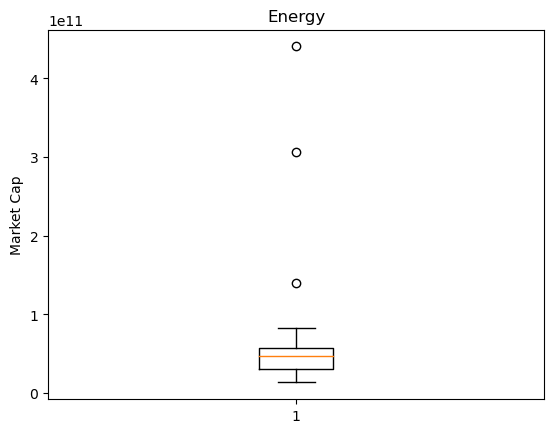

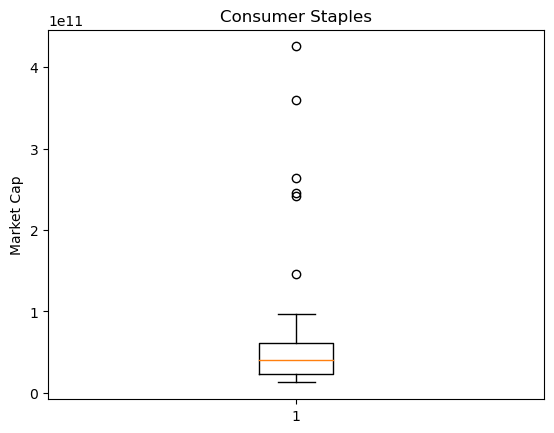

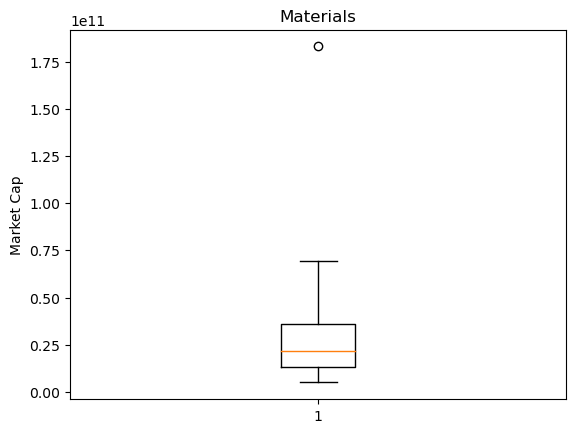

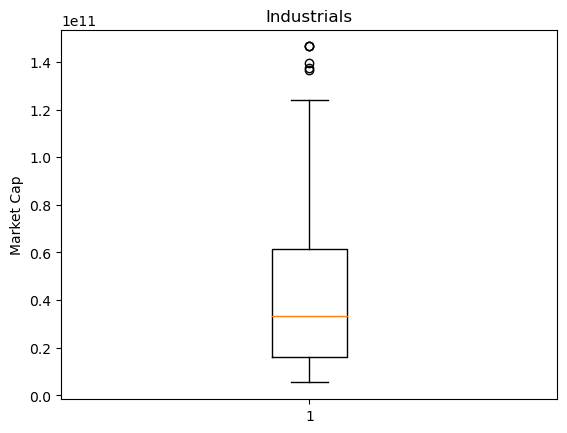

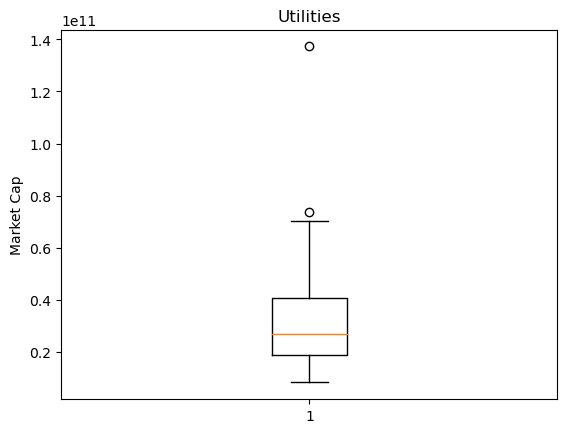

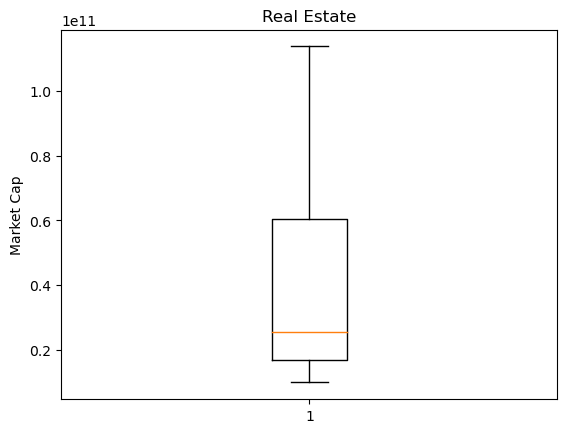

In [10]:
#Get list of unique sectors
sectors = companies["GICS Sector"].unique()

#Make a boxplot for each sector showing distribution of market cap
for sector in sectors:
    current_sector = companies[companies["GICS Sector"] == sector]
    plt.boxplot(current_sector['Market Capitalization'])
    plt.title(sector)
    plt.ylabel("Market Cap")
    plt.show()

Based on these boxplots, one thing that immediately jumps out is that for the industries Information Technology, Communication Services, and Consumer Discretionary market capitalization is heavily skewed to the upside and contains many outliers, so let's look into that. And see which companies dominate the S&P 500 in terms of market cap.

In [11]:
#Get all companies in the Information Technology sector, and sort from highest to lowest market cap
information = companies[companies["GICS Sector"] == "Information Technology"].sort_values(by='Market Capitalization', ascending=False)
information.head()

Ticker            Description             GICS Sector  Latest Price  \
0    AAPL             Apple Inc.  Information Technology        174.70   
1    MSFT  Microsoft Corporation  Information Technology        317.00   
7    NVDA     NVIDIA Corporation  Information Technology        435.00   
20   AVGO          Broadcom Inc.  Information Technology        826.52   
22   ORCL     Oracle Corporation  Information Technology        116.67   

    Market Capitalization 3 Mo. Price Change 3 Mo. Percent Change  \
0            2.728017e+12               1.31                0.76%   
1            2.351372e+12               2.88                0.92%   
7            1.069485e+12             131.66               43.63%   
20           3.408121e+11             169.63               25.80%   
22           3.161026e+11              15.11               15.15%   

   1 Year Price Change 1 Year Percent Change  
0                -0.55                -0.32%  
1                25.56                 8.77%  
7               250.09               136.40%  
20              288.51                53.57%  
22               35.63                44.96%

In [12]:
#Get all companies in the Communication Services sector, and sort from highest to lowest market cap
communication = companies[companies["GICS Sector"] == "Communication Services"].sort_values(by='Market Capitalization', ascending=False)

#We have some duplicate observations that'll we drop, and Google has two classes for its stock, and we'll only look at one of them (they're essentially the same)
indices_to_remove = [3, 4, 5]  # List of row indices to remove
communication = communication.drop(indices_to_remove)
communication.head()

Ticker           Description             GICS Sector  Latest Price  \
2    GOOG         Alphabet Inc.  Communication Services        127.63   
9    META  Meta Platforms, Inc.  Communication Services        283.17   
38  CMCSA   Comcast Corporation  Communication Services         45.60   
42   NFLX         Netflix, Inc.  Communication Services        404.51   
44   TMUS     T-Mobile US, Inc.  Communication Services        135.96   

    Market Capitalization 3 Mo. Price Change 3 Mo. Percent Change  \
2            1.611856e+12               9.08                7.51%   
9            7.289672e+11              42.61               17.57%   
38           1.887661e+11               5.95               14.77%   
42           1.792662e+11              63.04               18.54%   
44           1.601629e+11              -5.21               -3.68%   

   1 Year Price Change 1 Year Percent Change  
2                10.37                 8.67%  
9               110.24                63.05%  
38                6.98                17.78%  
42              161.85                67.12%  
44               -9.18                -6.31%

In [13]:
#Get all companies in the Consumer Discretionary sector, and sort from highest to lowest market cap
consumer_discre = companies[companies["GICS Sector"] == "Consumer Discretionary"].sort_values(by='Market Capitalization', ascending=False)
consumer_discre.head()

Ticker             Description             GICS Sector  Latest Price  \
6    AMZN        Amazon.com, Inc.  Consumer Discretionary        133.30   
21     HD  Home Depot, Inc. (The)  Consumer Discretionary        327.50   
35    MCD  McDonald’s Corporation  Consumer Discretionary        281.69   
62    LOW  Lowe’s Companies, Inc.  Consumer Discretionary        218.25   
79   SBUX   Starbucks Corporation  Consumer Discretionary         97.23   

    Market Capitalization 3 Mo. Price Change 3 Mo. Percent Change  \
6            1.366884e+12              18.48               16.00%   
21           3.291300e+11              34.96               11.96%   
35           2.053218e+11             -11.69               -3.98%   
62           1.285349e+11              10.80                5.21%   
79           1.113672e+11              -9.12               -8.63%   

   1 Year Price Change 1 Year Percent Change  
6                -8.12                -5.71%  
21                1.60                 0.49%  
35               14.92                 5.59%  
62                2.67                 1.24%  
79                8.22                 9.30%

From these tables, we can that the most promenient companies in the S&P 500 are: Apple, Microsoft, Alphabhet (Google), Amazon, and NVIDIA, in that order in terms of market capitalization, as we previously mentioned in the introduction. 

Next, for the three biggest sectors in the S&P 500: Information Technology, Communication Services, and Consumer Discretionary, let's look at the price change in the past year (y-axis) plotted against current share price (x-axis).

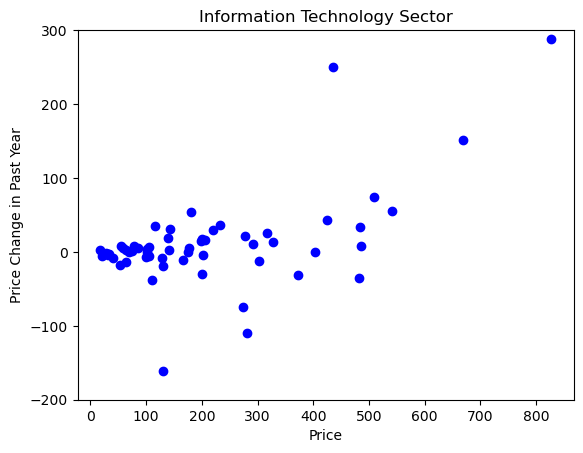

In [14]:
#Convert column from string to float
information["1 Year Price Change"] = information["1 Year Price Change"].astype(float)

#For the Information Technology sector, make a scatterplot with price on x-axis, price-change in past year on y-axis.
plt.scatter(information["Latest Price"], information["1 Year Price Change"], color='blue', marker='o', label='Data Points')
plt.title("Information Technology Sector")
plt.xlabel("Price")
plt.ylabel("Price Change in Past Year")
plt.ylim(-200, 300)
plt.show()

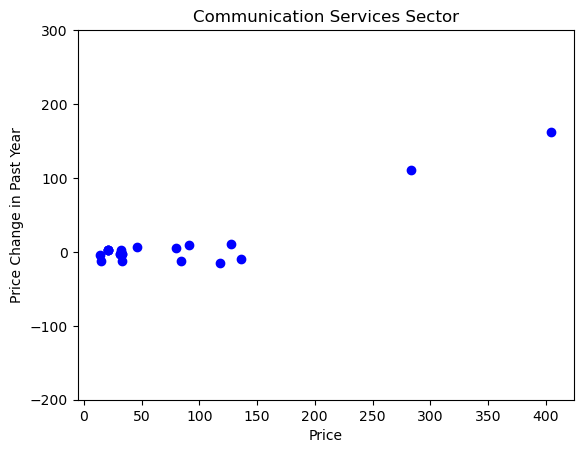

In [15]:
#For the Communication Services sector, make a scatterplot with price on x-axis, price-change in past year on y-axis.
communication["1 Year Price Change"] = communication["1 Year Price Change"].astype(float)
plt.scatter(communication["Latest Price"], communication["1 Year Price Change"], color='blue', marker='o', label='Data Points')
plt.title("Communication Services Sector")
plt.xlabel("Price")
plt.ylabel("Price Change in Past Year")
plt.ylim(-200, 300)
plt.show()

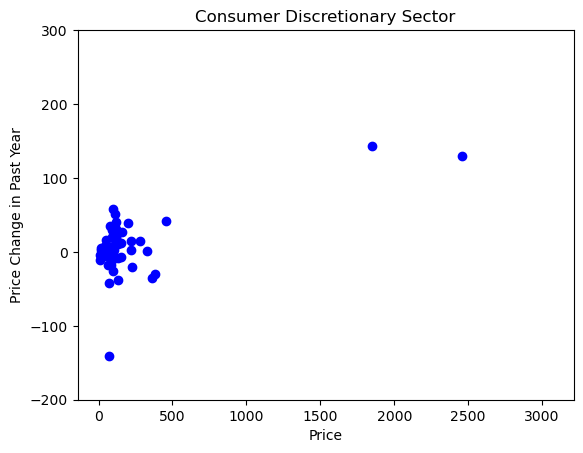

In [16]:
#For the Consumer Discretionary sector, make a scatterplot with price on x-axis, price-change in past year on y-axis.
consumer_discre["1 Year Price Change"] = consumer_discre["1 Year Price Change"].astype(float)
plt.scatter(consumer_discre["Latest Price"], consumer_discre["1 Year Price Change"], color='blue', marker='o', label='Data Points')
plt.title("Consumer Discretionary Sector")
plt.xlabel("Price")
plt.ylabel("Price Change in Past Year")
plt.ylim(-200, 300)
plt.show()

From these plots of price change in the past year vs current price, we see that overall, companies in all 3 sectors on average have increased their share prices. The information sector appears to be performing the best. Let's do this again, but look at percent change instead of price change for just the information sector. 

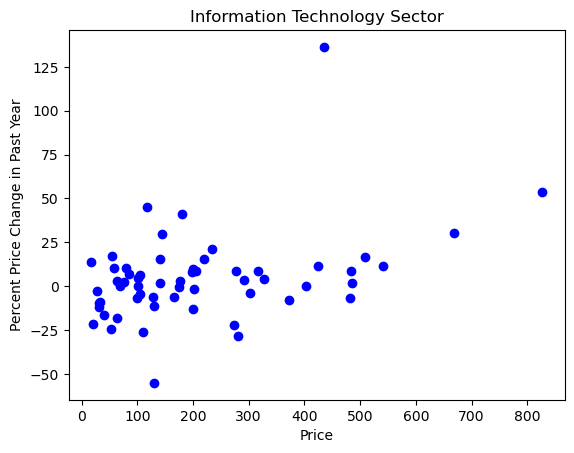

In [17]:
#Convert 1 Year Percent Change to a float
information["1 Year Percent Change"] = information["1 Year Percent Change"].str.replace('%', '').astype(float)

#For the Information Technology sector, make a scatterplot with price on x-axis, percent price change in past year on y-axis.
plt.scatter(information["Latest Price"], information["1 Year Percent Change"], color='blue', marker='o', label='Data Points')
plt.title("Information Technology Sector")
plt.xlabel("Price")
plt.ylabel("Percent Price Change in Past Year")
plt.show()

From this plot of percent price change vs price for the information technology sector, there are two things to note.
There is a positive trend: companies that have a higher price tend to increase their stock price by a greater percent.
Secondly, there is one extreme outlier that we should take a look at.

In [18]:
information_sorted = information.sort_values(by='1 Year Percent Change', ascending=False)
information_sorted.head()

Ticker               Description             GICS Sector  Latest Price  \
7     NVDA        NVIDIA Corporation  Information Technology        435.00   
20    AVGO             Broadcom Inc.  Information Technology        826.52   
22    ORCL        Oracle Corporation  Information Technology        116.67   
151   ANET     Arista Networks, Inc.  Information Technology        181.00   
98    LRCX  Lam Research Corporation  Information Technology        669.00   

     Market Capitalization 3 Mo. Price Change 3 Mo. Percent Change  \
7             1.069485e+12             131.66               43.63%   
20            3.408121e+11             169.63               25.80%   
22            3.161026e+11              15.11               15.15%   
151           5.589168e+10              46.86               34.50%   
98            8.652219e+10              74.45               12.97%   

     1 Year Price Change  1 Year Percent Change  
7                 250.09                 136.40  
20                288.51                  53.57  
22                 35.63                  44.96  
151                53.28                  41.17  
98                151.00                  30.35

Nvidia current share price is 136.40% higher than its price one year ago. By far the greatest increase out of all stocks in the information technology sector. Let's plot NVIDIA's share price over time.

Text(0.5, 1.0, 'NVIDIA share price')

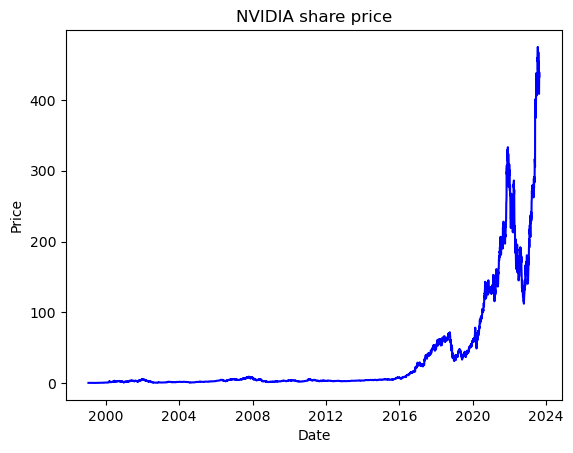

In [19]:
#The table "nvda" holds price information about NVIDIA including date and closing share price (close)
#Line plot of NVIDIA's closing price for the day on y-axis, and date on x-axis 
plt.plot(nvda["date"], nvda["close"], color='blue', label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVIDIA share price')

And let's compare this plot to that of Apple (the largest company in the S&P 500) and the entire S&P 500 as a whole.

Text(0.5, 1.0, 'Apple share price')

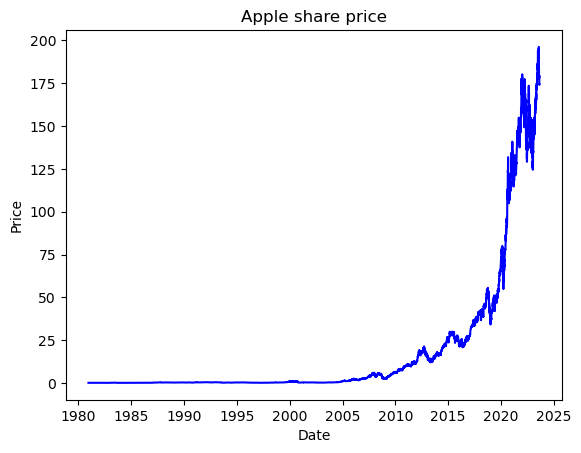

In [20]:
#The table "aapl" holds price information about Apple including date and closing share price (close)
#Line plot of Apple's closing price for the day on y-axis, and date on x-axis 
plt.plot(aapl["date"], aapl["close"], color='blue', label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple share price')

Text(0.5, 1.0, 'SPY (S&P 500) share price')

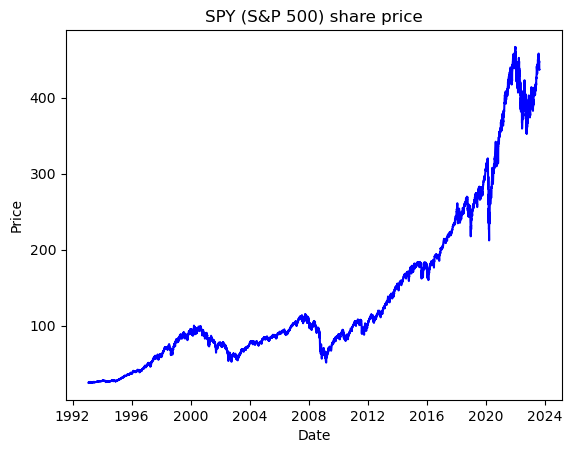

In [21]:
#The table "spy" holds price information about SPY (S&P 500) including date and closing share price (close)
#Line plot ofSPY (S&P 500) closing price for the day on y-axis, and date on x-axis 
plt.plot(spy["date"], spy["close"], color='blue', label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY (S&P 500) share price')

From these plots, Apple and Nvidia's stock price appear to have increased more dramatically over time compared to that of the rest of the S&P 500. 

## Part 3: Hypothesis Testing and Machine Learning

First we're going to create a linear regression model for SPY (S&P 500), Apple, and Nvidia to get an idea of the trend for these stock prices. 
Linear regression is used to model a relationship dependent variable and independent variable(s). And it used to predict values of unknown data. 
For our case, we will be using linear regression to find the correlation between the year and a stock's price, and we could use this to predict future stock prices based on past years (learn more about linear regression here https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/) 

In [22]:
spy2 = spy.copy()
#Convert date back to string
spy2["date"] = spy2["date"].dt.strftime('%Y-%m-%d')
#Keep only the year for the date
spy2["date"] = spy2["date"].str.split("-").str[0]
spy2["date"] = spy2["date"].astype(int)

In [23]:
from sklearn.linear_model import LinearRegression

#Get date and closing price information ready for linear regression model
x = spy2["date"] 
y = spy2["close"]
x = x.to_numpy().reshape(-1,1)

#Fit the linear regression model using date as indepedent variable, and closing price (close) as dependent variable
model = LinearRegression().fit(x,y)

#Get slope and intercept for SPY prices over time
b = model.intercept_
m = model.coef_[0]

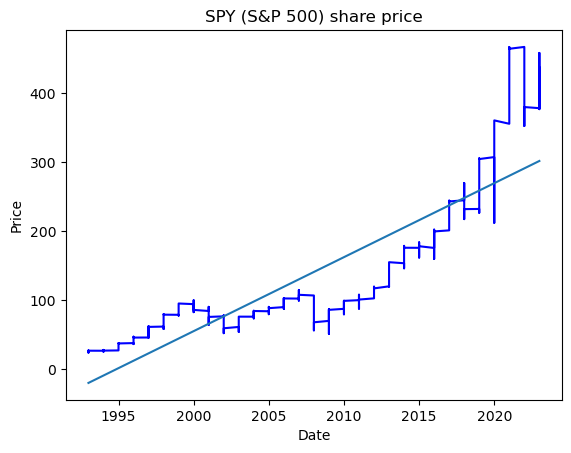

In [24]:
#Plot of date (year only) on x-axis, and price on y-axis for SPY
plt.plot(spy2["date"], spy2["close"], color='blue', label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY (S&P 500) share price')

#Include the linear regression line to the plot
plt.plot(spy2["date"], m*spy2["date"]+b)

In [25]:
print(m)

10.699733115465424


Based on the slope of the linear regression equation, every year, the value of the S&P 500 index is predicted to gain 10.7 dollars.

In [26]:
#Let's forcast for the year 2030 using our model
print(m*2030 + b)

376.4758466510284


From this we see that the predicted price in 2030 will 376.5 dollars. However, the current price of the SPY is already above that. 
From the above line graph we see that the growth of the S&P 500 has increased in recent years. So, let's consider a different time frame for linear regression model and do it again.

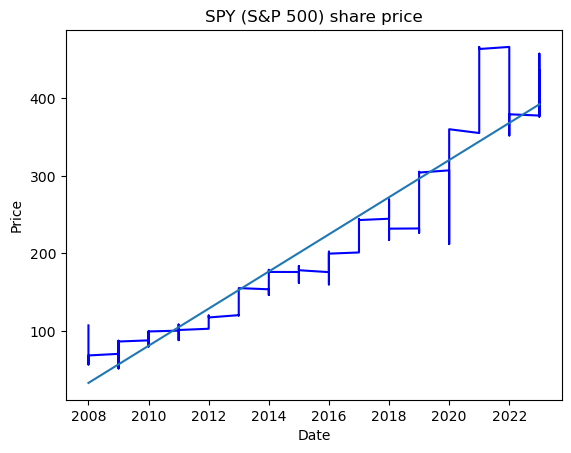

In [27]:
#Keep only the years after 2008
spy3 = spy2.copy()
spy3 = spy3[spy3["date"] > 2007]

#Make linear regression model again, and get intercept and slope
x = spy3["date"]
y = spy3["close"]

x = x.to_numpy().reshape(-1,1)
model = LinearRegression().fit(x,y)
b = model.intercept_
m = model.coef_[0]

#Plot the price vs date for this new timeframe (2008 and later)
plt.plot(spy3["date"], spy3["close"], color='blue', label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY (S&P 500) share price')

#Plot regression line for our updated model
plt.plot(spy3["date"], m*spy3["date"]+b)

In [28]:
print(m)

23.974545667816784


Based on this model, looking at a different timeframe, the SPY is projected to increase by 24 dollars a year.  

In [29]:
print(m*2030 + b)

560.2452416732194


And the projected price of the spy in 2030 this time is 560.25 dollars.
Let's generate a linear regression model Apple as well.

In [30]:
aapl2 = aapl.copy()
#Convert date back to string
aapl2["date"] = aapl2["date"].dt.strftime('%Y-%m-%d')
#Keep only the year for the date
aapl2["date"] = aapl2["date"].str.split("-").str[0]
aapl2["date"] = aapl2["date"].astype(int)

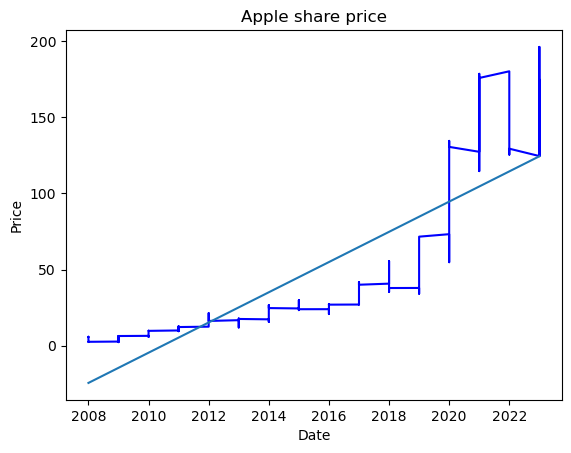

In [31]:
#Keep only the years after 2008
aapl2 = aapl2[aapl2["date"] > 2007]

#Make linear regression model again
x = aapl2["date"]
y = aapl2["close"]
x = x.to_numpy().reshape(-1,1)
model = LinearRegression().fit(x,y)

#Get slope and intercept
b = model.intercept_
m = model.coef_[0]

#Plot of date on x-axis, and price on y-axis for Apple
plt.plot(aapl2["date"], aapl2["close"], color='blue', label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple share price')
#Include linear regression line
plt.plot(aapl2["date"], m*aapl2["date"]+b)

In [32]:
print(m)

9.919473519752874


Based on this linear regression model, the share price of Apple is projected to increased by 9.9 dollars every year.

In [33]:
print(m*2030 + b)

193.8236350857951


In 2030, the projected share price is 193.8 dollars.

Next, let's perform the K-Nearest Neighbors algorithm on our S&P 500 companies. Our goal will be to find companies that are most similar to a company of our choosing. The features we will be using are: the latest price, market cap, percent price change in past 3 months, and percent price change in the past year. The idea is that we want to identify companies that are similar in price and price activity. The K-Nearest Neighbors algorithm is a supervised machine learning algorithm that uses a distance metric to make classifications. In our case we want the KNN algorithm to find the most similar or a group of similar companies. Learn more about the KNN algoirthm here https://www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point. 

In [34]:
#Convert columns to type float
companies["Latest Price"] = companies["Latest Price"].astype(float)
companies["Market Capitalization"] = companies["Market Capitalization"].astype(float)
companies["1 Year Percent Change"] = companies["1 Year Percent Change"].str.replace("%", "").astype(float)
companies["3 Mo. Percent Change"] = companies["3 Mo. Percent Change"].str.replace("%", "").astype(float)

In [35]:
#Drop some other columns
columns_to_drop = ["3 Mo. Price Change", "1 Year Price Change"]
companies = companies.drop(columns=columns_to_drop)
companies

#Drop duplicate rows of google 
rows_to_drop = [3, 4, 5]
companies = companies.drop(index=rows_to_drop)
companies = companies.reset_index(drop=True)
companies.head()

Ticker            Description             GICS Sector  Latest Price  \
0   AAPL             Apple Inc.  Information Technology        174.70   
1   MSFT  Microsoft Corporation  Information Technology        317.00   
2   GOOG          Alphabet Inc.  Communication Services        127.63   
3   AMZN       Amazon.com, Inc.  Consumer Discretionary        133.30   
4   NVDA     NVIDIA Corporation  Information Technology        435.00   

   Market Capitalization  3 Mo. Percent Change  1 Year Percent Change  
0           2.728017e+12                  0.76                  -0.32  
1           2.351372e+12                  0.92                   8.77  
2           1.611856e+12                  7.51                   8.67  
3           1.366884e+12                 16.00                  -5.71  
4           1.069485e+12                 43.63                 136.40

In [36]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

#Select features we want to compare
features = ["Latest Price","Market Capitalization" ,"3 Mo. Percent Change", "1 Year Percent Change"]
X = companies[features].values #Matrix containing each company and their features

#Scale our features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#Set number of neighbors
k = 4

# Apply the KNN algorithm
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(X_scaled)

NearestNeighbors(metric='euclidean', n_neighbors=4)

In [37]:
# Find similar companies to Apple (index 0 in our table)
apple = companies.loc[0, features]  

#Scale apple's features and apply knn
apple_scaled = scaler.transform(apple.values.reshape(1, -1))
distances, indices = knn.kneighbors(apple_scaled)

# Get the similar companies
similar_companies_indices = indices.flatten()  
similar_companies = companies.loc[similar_companies_indices, :]
similar_companies

Ticker            Description             GICS Sector  Latest Price  \
0   AAPL             Apple Inc.  Information Technology        174.70   
1   MSFT  Microsoft Corporation  Information Technology        317.00   
2   GOOG          Alphabet Inc.  Communication Services        127.63   
3   AMZN       Amazon.com, Inc.  Consumer Discretionary        133.30   

   Market Capitalization  3 Mo. Percent Change  1 Year Percent Change  
0           2.728017e+12                  0.76                  -0.32  
1           2.351372e+12                  0.92                   8.77  
2           1.611856e+12                  7.51                   8.67  
3           1.366884e+12                 16.00                  -5.71

We found that the companies most similar to Apple are Microsoft, Alphabet (Google), and Amazon. This shouldn't be much of a suprise as they are the largest big tech companies. They have the highest market caps, high prices (above $100). I'm curious if the results would be different if market cap isn't a feature that the KNN algorithms considers, so let's try that.

In [38]:
#Repeat above steps, but don't consider Market Cap as a feature this time
features = ["Latest Price","3 Mo. Percent Change", "1 Year Percent Change"] 
X = companies[features].values #Matrix of containing each company and their features

#Scale our features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#Set number of neighbors
k = 4

# Apply the KNN algorithm
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(X_scaled)

NearestNeighbors(metric='euclidean', n_neighbors=4)

In [39]:
# Find similar companies to Apple
apple = companies.loc[0, features]  
#Scale apple's features and apply knn
apple_scaled = scaler.transform(apple.values.reshape(1, -1))
distances, indices = knn.kneighbors(apple_scaled)

# Get the similar companies
similar_companies_indices = indices.flatten()  
similar_companies = companies.loc[similar_companies_indices, :]
similar_companies

Ticker              Description             GICS Sector  Latest Price  \
0     AAPL               Apple Inc.  Information Technology        174.70   
173    RSG  Republic Services, Inc.             Industrials        145.66   
344    DOV        Dover Corporation             Industrials        140.57   
20     CVX      Chevron Corporation                  Energy        160.80   

     Market Capitalization  3 Mo. Percent Change  1 Year Percent Change  
0             2.728017e+12                  0.76                  -0.32  
173           4.627216e+10                  0.15                  -1.47  
344           1.966206e+10                 -0.06                   0.46  
20            3.069325e+11                  2.62                   1.31

As could be expected, when market cap isn't a feature to be considered, the similar companies are different. Now the similar companies to Apple are Republic Services, Dover Corporation, and Chevron Corporation. These companies don't have as large as a market cap as Apple, however, these companies are more similar in their percent change in price over 3 months and 1 year. 

To close out, let's run the KNN algorithm one more time, this time on NVIDIA. NVIDIA stock has stockrocketed over the past year due to increasing hype around AI. Advanced GPUs are crucial for running large complex machine learning algorithms, and since NVIDIA has always been ahead of the curve on GPU development, their AI chips are in high demand for use in data centers. We would expect that similar companies to NVIDIA have also jumped up in share price recently.

In [40]:
# Find similar companies to NVIDIA (index 4 in our table)
nvda = companies.loc[4, features]  
nvda_scaled = scaler.transform(nvda.values.reshape(1, -1)) #Scaled features for nvda
distances, indices = knn.kneighbors(nvda_scaled)

# Get the similar companies
similar_companies_indices = indices.flatten()  
similar_companies = companies.loc[similar_companies_indices, :]
similar_companies

Ticker                   Description             GICS Sector  \
4     NVDA            NVIDIA Corporation  Information Technology   
301    RCL  Royal Caribbean Cruises Ltd.  Consumer Discretionary   
7      LLY         Eli Lilly and Company             Health Care   
39    NFLX                 Netflix, Inc.  Communication Services   

     Latest Price  Market Capitalization  3 Mo. Percent Change  \
4          435.00           1.069485e+12                 43.63   
301         99.20           2.541240e+10                 25.00   
7          547.13           5.187233e+11                 22.87   
39         404.51           1.792662e+11                 18.54   

     1 Year Percent Change  
4                   136.40  
301                 137.64  
7                    69.65  
39                   67.12

We see that the most similar company to NVDIA is Royal Caribbean Cruises, whose stock price has jumped up 137.6% in the past year, even more than NVIDIA's. And the other two similar companies: Eli Lilly and Company and Netflix, have also seen impressive gains over the past 3 months and 1 year.

## Closing Remarks

In this day and age, data is plentiful - especially for something as important as the stock market. There are many insights to be gained from financial data, insights that can help you make more-informed investment decisions. In this tutorial, we explored exploratory data analysis to identify trends/outliers in the S&P 500. We created linear regression models to predict prices in future years, and finally, we used the K-Nearest Neighbors machine learning algorithm to identify which companies in the S&P 500 are similar to each other based on features we select. Hope you enjoyed!